<h1>Perceptron in scikit-learn</h1>

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn import datasets
import numpy as np 

Loading iris data from sklearn

In [5]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print(f"Class labels: {np.unique(y)}")
print(f"Predictors: {X[0:6]} with shape {X.shape}\nResponses {y[0:6]} with shape {y.shape}")

Class labels: [0 1 2]
Predictors: [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]] with shape (150, 2)
Responses [0 0 0 0 0 0] with shape (150,)


Splitting data into training and testing sets, where 70% of the data is trainig data the rest is testing data. Random state is the seed variable for rng and stratify ensures that the proportion of class labels in training and testing data remains samilar.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 1, stratify = y)

In [7]:
print(f"Dataset class label counts: {np.bincount(y)}")
print(f"Training data class label counts: {np.bincount(y_train)}")
print(f"Testing data class label counts: {np.bincount(y_test)}")

Dataset class label counts: [50 50 50]
Training data class label counts: [35 35 35]
Testing data class label counts: [15 15 15]


Feature Scaling, standardizing the data for optimal performance.

In [8]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Training a perceptron to classify flowers into three different classes.

In [9]:
ppn = Perceptron(eta0 = 0.1, random_state = 1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

Using the trained perceptron to make predictions on the testing data and reporting the error and accuracy of the model.

In [10]:
preds = ppn.predict(X_test_std)
num_misclassification = sum(y_test != preds)
print(f"Number of misclassifications: {num_misclassification}\nMisclassification error: {(num_misclassification / len(y_test)) * 100}\nAccuracy: {(1 - (num_misclassification / len(y_test))) * 100}")

Number of misclassifications: 1
Misclassification error: 2.2222222222222223
Accuracy: 97.77777777777777


Using sklearn's and the perceptron's built in accuracy calculators

In [11]:
print(f"Accuracy (sklearn accuracy_score): {accuracy_score(preds, y_test)}")
print(f"Accuracy (Perceptron accuracy): {ppn.score(X_test_std, y_test)}")

Accuracy (sklearn accuracy_score): 0.9777777777777777
Accuracy (Perceptron accuracy): 0.9777777777777777


Vizualizaition of the learned parameters and decision boundaries

In [16]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [17]:
# This is visualization code taken straight from the book

def plot_decision_regions(X, y, classifier, test_idx=None,resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=f'Class {cl}',
        edgecolor='black')
    
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='Test set')

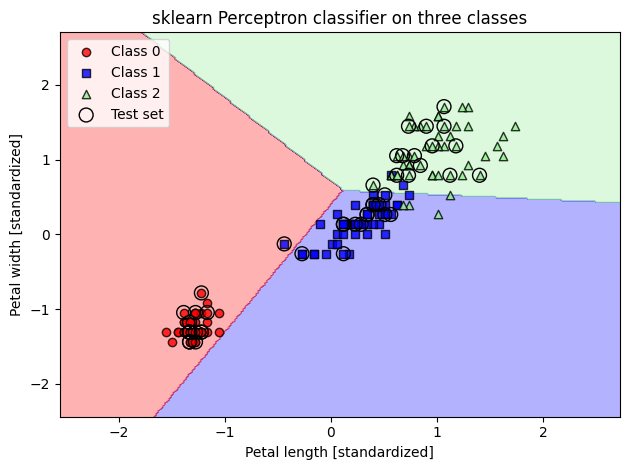

In [18]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.title("sklearn Perceptron classifier on three classes")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Here, the classes are not linearly separable, so the perceptron algorithm does not converge

<h1>Logistic Regression</h1>

In [19]:
# sigmoid activation function
def sigmoid(z):
    return 1 / (1 + (np.e ** -z))

# loss function for when y = 0
def loss_0(z):
    return -np.log(1 - sigmoid(z))

# loss function for when y = 1 
def loss_1(z):
    return -np.log(sigmoid(z))

Loss function for a single training example

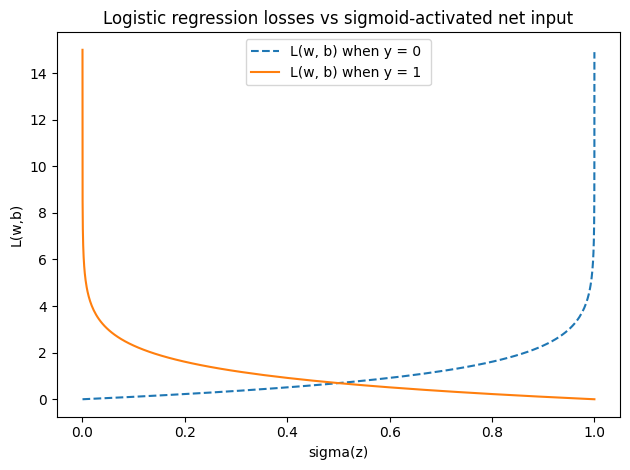

In [20]:
z = np.arange(-15, 15, 0.1)
sigma_z = sigmoid(z)
losses_0 = [loss_0(x) for x in z]
losses_1 = [loss_1(x) for x in z]
plt.plot(sigma_z, losses_0, linestyle = "--", label = "L(w, b) when y = 0 ")
plt.plot(sigma_z, losses_1, label = "L(w, b) when y = 1 ")
plt.xlabel("sigma(z)")
plt.ylabel("L(w,b)")
plt.title("Logistic regression losses vs sigmoid-activated net input")
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
from classifiers.LogisticRegressionGD import LogisticRegressionGD

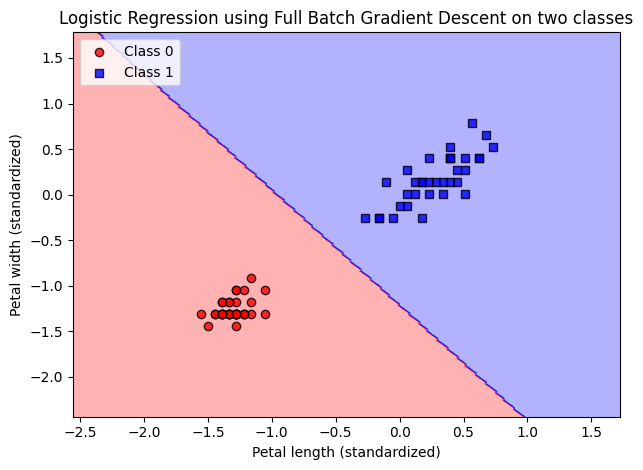

In [22]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrGD = LogisticRegressionGD(eta=0.1, n_iter=1000, random_state=1)
lrGD.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrGD)
plt.xlabel("Petal length (standardized)")
plt.ylabel("Petal width (standardized)")
plt.title("Logistic Regression using Full Batch Gradient Descent on two classes")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

<h1>Using scikit-learn to train a logistic regression model</h1>

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier

In [24]:
# fitting the logistic regression model on standardized inputs and outputs
# multiclass

# book asks to do this, but this is depricated
# log_reg = LogisticRegression(C = 100, solver = "lbfgs", multi_class = "ovr") 

log_reg = OneVsOneClassifier(LogisticRegression(C = 100, solver = "lbfgs"))
log_reg.fit(X_train_std, y_train)

OneVsOneClassifier(estimator=LogisticRegression(C=100))

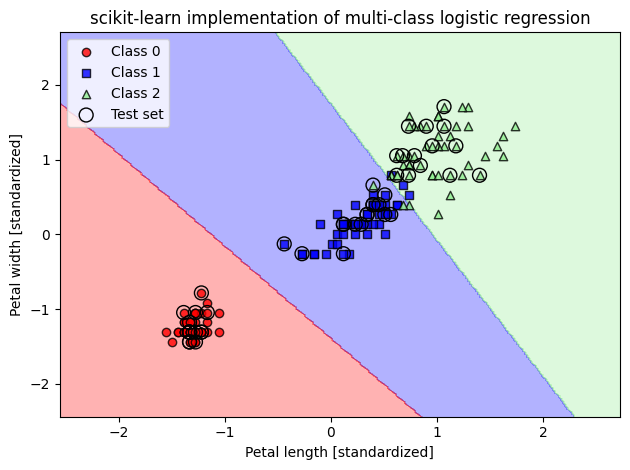

In [25]:
# plotting decision boundaries
plot_decision_regions(X_combined_std, y_combined, classifier = log_reg, test_idx = range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.title("scikit-learn implementation of multi-class logistic regression")
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [26]:
# predicting class-membership probabilities of first 5 training examples
print("  Iris-setosa    Iris-versicolor Iris-virginica")
print(log_reg.predict(X_test_std[ : 5, : ]))

# cannot predict class-membership probabilities anymore cuz of OneVsRestClassifier
#log_reg.predict_proba(X_test_std[ : 5, : ])

# instead, use decision_function to get no.of votes and convert those to probabilities
# by dividing each row by sum of its elements
# this is not the same output as that of predict_proba, but we end up with similar results
p = log_reg.decision_function(X_test_std[ : 5, : ])
p /= p.sum(axis = 1)[:, None]
print(p)

  Iris-setosa    Iris-versicolor Iris-virginica
[2 0 0 1 1]
[[-0.09761542  0.39580748  0.70180794]
 [ 0.69856963  0.39956171 -0.09813134]
 [ 0.69905545  0.39920452 -0.09825997]
 [-0.09706296  0.71216636  0.3848966 ]
 [-0.11063718  0.82449043  0.28614675]]


In [27]:
# predicting classes of first 5 training examples
# 0 is Iris-setosa, 1 is Iris-versicolor, 2 is Iris-virginica
log_reg.predict(X_test_std[ : 5, : ])

array([2, 0, 0, 1, 1])

<h1>Regularization</h1>

/Users/siddarthchilukuri/Documents/GitHub/teaching-myself-AI/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/siddarthchilukuri/Documents/GitHub/teaching-myself-AI/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/siddarthchilukuri/Documents/GitHub/teaching-myself-AI/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its defa

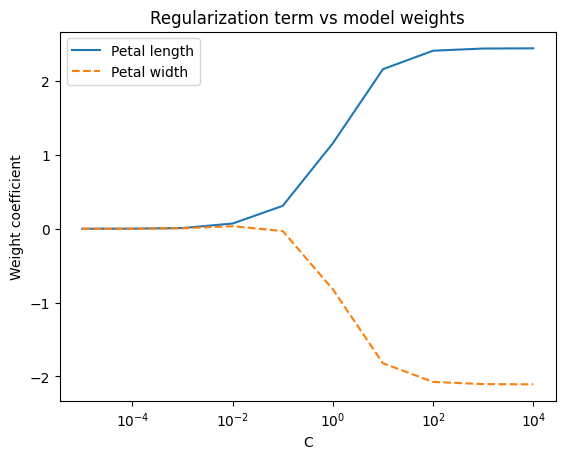

In [28]:
weights, params = [], []
for c in np.arange(-5, 5):
    # using depricated multi_class method cuz OneVsRest does not 
    # let you access weights
    lr = LogisticRegression(C=10.**c, multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0], label='Petal length') 
plt.plot(params, weights[:, 1], linestyle='--', label='Petal width')
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.title("Regularization term vs model weights")
plt.xscale('log')
plt.show()

Support Vector Machines

In [29]:
from sklearn.svm import SVC

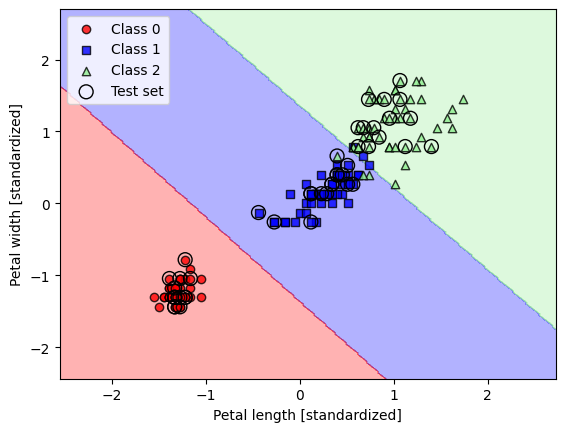

In [33]:
svm = SVC(kernel="linear",          # kernel function
          C=1.0,                    # hyperparameter
          random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

Kernel SVMs

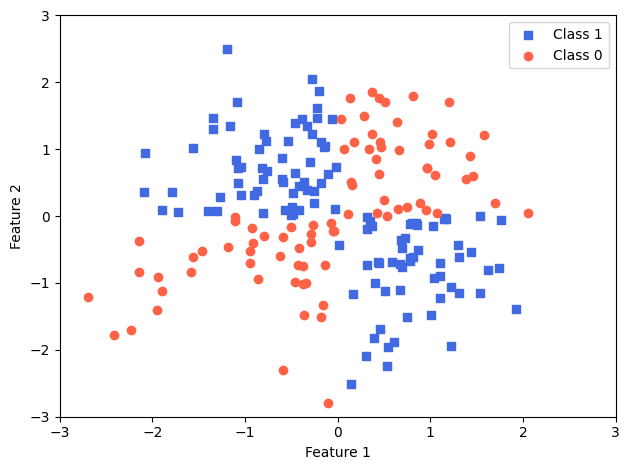

In [35]:
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='royalblue', marker='s', label='Class 1')

plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1],c='tomato', marker='o', label='Class 0')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

A mapping function takes data that isn't linearly separable and projects it onto a higher dimension where it is linearly separable. This is expensive to do though, so we define a kernel function. Radial Basis Function (RBF) is one of the most commonly used ones. 

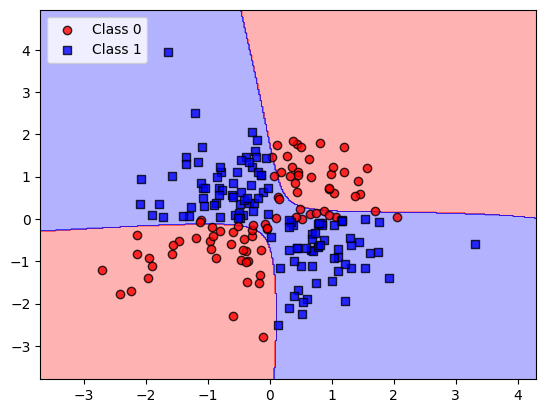

In [36]:
svm = SVC(kernel='rbf',         # kernel function 
          random_state=1, 
          gamma=0.10,           # another hyperparameter
          C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

Decision Trees

Decision trees iteratively split data on the features that result in the largest Information Gain until leaves are pure (examples in those nodes belong to the same class). 



Information gain is the difference between impurity of the parent node and the sum of impurities of the child nodes. Lower child node impurities = larger IG. 


For simplicity, binary decision trees are used. 

Commonly used impurity functions - Gini Impurity, Entropy, Classification Error. 


Entropy = I_H(t) = -SUM( p(i|t) * log_2(p(i|t)) ) from 1 to c.


Entropy is 0 if all data at one node belongs to the same class, maximum if it forms a uniform dist. 

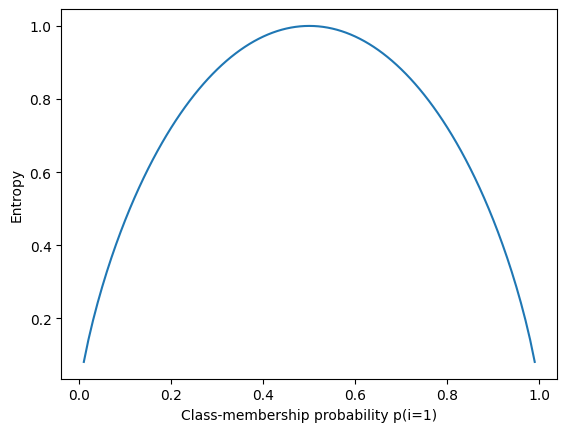

In [37]:
def entropy(p): 
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
plt.ylabel('Entropy')
plt.xlabel('Class-membership probability p(i=1)')
plt.plot(x, ent)

Gini impurity is a criterion that aims to minimize probability of misclassification.

I_G(t) = SUM( p(t|t) * (1 - p(i|t)) ) from 1 to c = 1 = SUM( p(i|t)^2 ) from 1 to c

Both Gini impurity and entropy give in very similar results, so its often better to just focus on depth cutoffs than different impurity functions. 

Classification error = I_E(t) = 1 - max(p(i|t))

Classification error is useful for pruning the tree, but not very good for growing a tree.

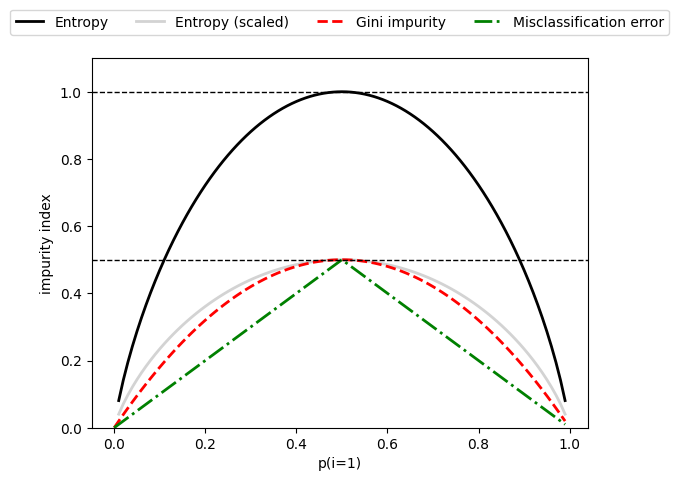

In [38]:
def gini(p):
    return p*(1 - p) + (1 - p)*(1 - (1-p))
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
def error(p):
    return 1 - np.max([p, 1 - p])
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)',
                           'Gini impurity',
                           'Misclassification error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray',
                           'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab,
                   linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


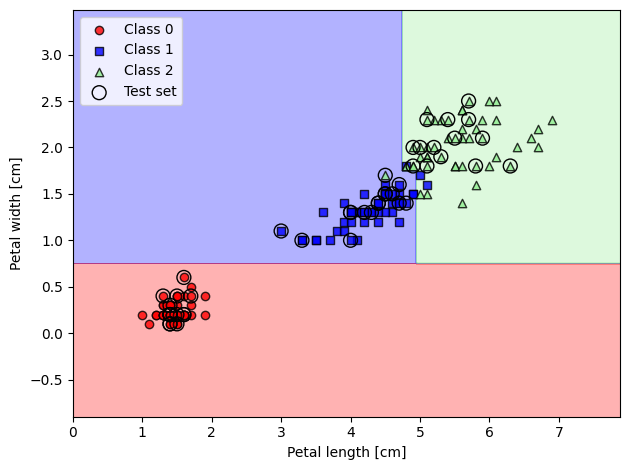

In [40]:
tree_model = DecisionTreeClassifier(criterion='gini',   # impurity function
                                    max_depth=4,        # max depth
                                    random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, 
                      y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

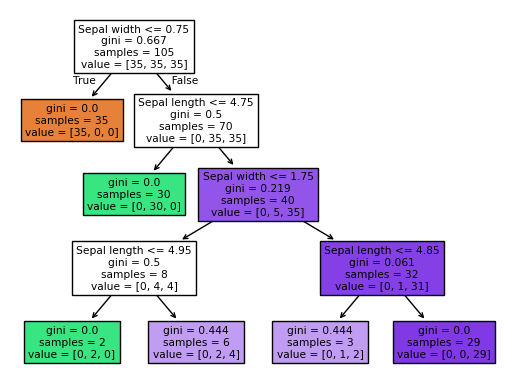

In [42]:
feature_names = ['Sepal length', 'Sepal width',
                 'Petal length', 'Petal width']
tree.plot_tree(tree_model,
               feature_names=feature_names,
               filled=True)
plt.show()

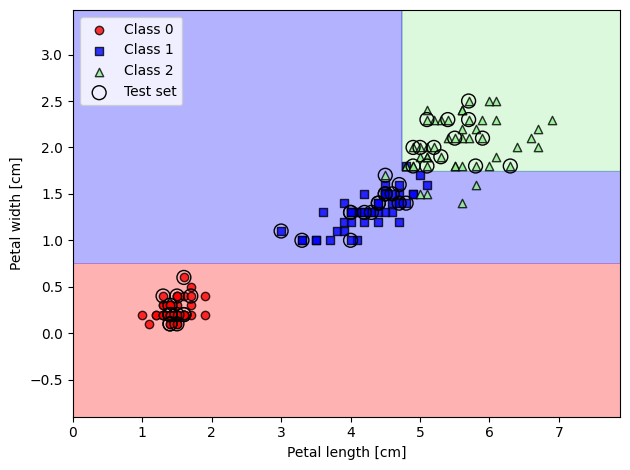

In [43]:
tree_model_3 = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=3,
                                    random_state=1)
tree_model_3.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, 
                      y_combined, 
                      classifier=tree_model_3,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

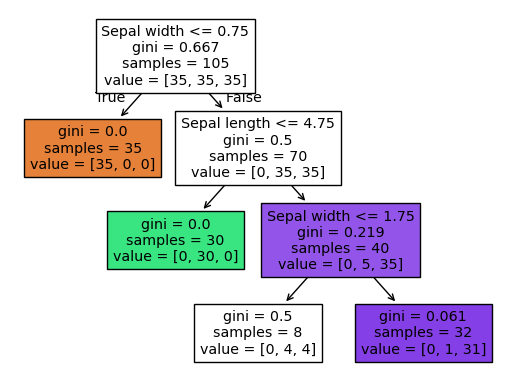

In [44]:
feature_names = ['Sepal length', 'Sepal width',
                 'Petal length', 'Petal width']
tree.plot_tree(tree_model_3,
               feature_names=feature_names,
               filled=True)
plt.show()

Random Forest - Build multiple decision trees and merge them into a forest

Random forest algorithm: <br>
- Draw a random bootstrap sample of size n
- Grow a decision tree for each bootstrap sample by randomly selecting d features at each node (without replacement) and then split using the features that maximizes objective function
- Repeat above steps k times
- Majority vote

Since we're averaging values, random forests are less sensitive to overfitting and we don't need to worry about hyperparameters as much.

Hyperparameters that can be optimized are:
- bootstrap sample size n - decreasing n increases diversity in each individual tree and increases randomness. This leads to less overfitting but in practice, test scores are low. High n leads to overfitting. Usually chosen to just be the number of training examples in the original dataset.
- number of features d - a good default value is sqrt(m) where m is number of features in the training dataset.

In [45]:
from sklearn.ensemble import RandomForestClassifier

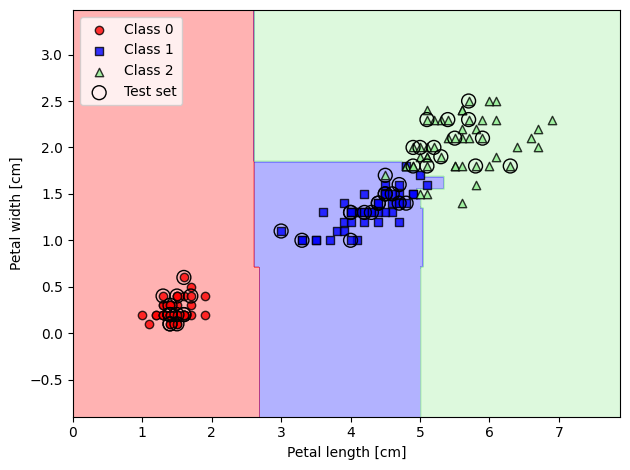

In [46]:
forest = RandomForestClassifier(n_estimators=25,    # number of trees 
                                random_state=1,
                                n_jobs=2)           # parallelizing
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined,
                      classifier=forest, test_idx=range(105,150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Parametric models - learn parameters of a function to classify new data points (perceptron, logistic regression, linear SVM) <br>
Non-parametric models - no fixed set of parameters and number of parameters changes and training data changes (decision tree, random forest, kernel SVM).

KNN - Non parametric, instance based, lazy learning (instance based = memorizes the training data, lazy learning = no cost)

In [47]:
from sklearn.neighbors import KNeighborsClassifier

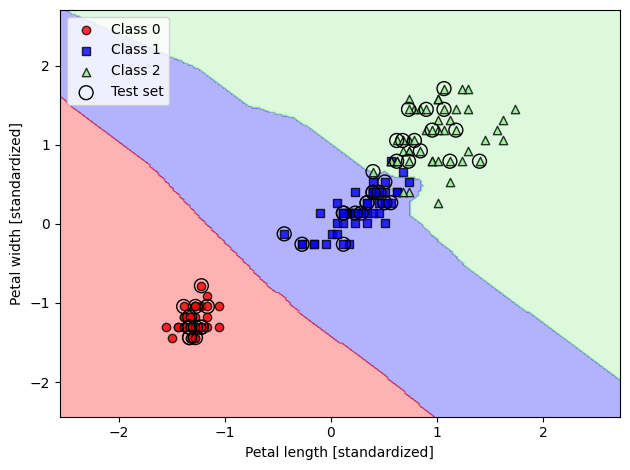

In [48]:
knn = KNeighborsClassifier(n_neighbors=5, p=2,
                           metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=knn, test_idx=range(105,150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

KNN is very susceptible to overfitting cuz of the **curse of dimensionality** - feature space becomes increasingly sparse for a higher dimensional space